In [8]:
#user-defined
import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import statsmodels.formula.api as smf

#plots
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib as mat
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()

#misc
import time
np.set_printoptions(suppress=True)


In [9]:
#load data
set_number = 5

dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/Run03/Set0'+str(set_number)+'/'
dir_save = '../../../Research/Images/Images/'


wind_load= 'wind0'+str(set_number)+'Run03_InterpolatedX.hdf'
wind_load_small = 'wind0'+str(set_number)+'Run03_InterpolatedXs.hdf'

windn = pd.read_hdf(dir+wind_load)
windsm = pd.read_hdf(dir+wind_load_small)

<AxesSubplot:xlabel='time', ylabel='odor'>

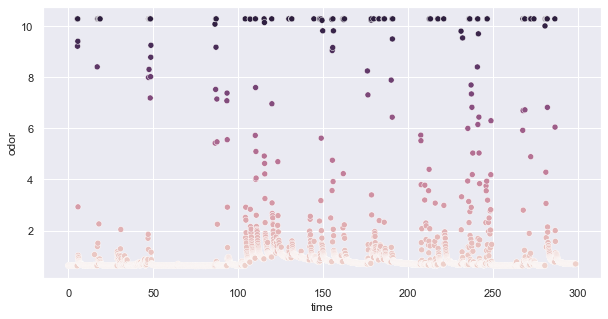

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df, x ='time', y ='odor', hue='odor', legend=False)

In [10]:
df = pd.DataFrame()
df = windsm
dt= df.master_time[1]-df.master_time[0]
sync_time = df.master_time-df.master_time[0]
df.insert(1,'time',sync_time)
# plt.figure(figsize=(15,5))
# plt.plot(df.time,df.odor)
# plt.xlabel('Time')
# plt.ylabel('Odor Concentration')

In [6]:
odor_position = np.array([[df.xsrc[i],df.ysrc[i]] for i in range (len(df))]) 
source = np.array([[0,0]])
distance_from_source = np.array([cdist(odor_position,source)]).flatten()

In [216]:
## getting the indexes for odor over a threshold to determine each encounter
def get_index(df):
    idx = []
    for i in range(len(df.odor)):
        if (df.odor[i]>1.5):
            idx.append(df.index[i])

    from itertools import groupby
    from operator import itemgetter
    index = [ ]
    for k, g in groupby(enumerate(idx),lambda ix : ix[0] - ix[1]):
        index.append((list((map(itemgetter(1), g)))))
    return index

In [217]:
fdf=pd.DataFrame()
index = get_index(df)

In [218]:
i = 0
avg_dist_fromsource = []
while i<len(index):
    avg_dist_fromsource.append(np.mean(distance_from_source[index[i]]))
    i+=1
fdf['avg_dist_fromsource']=avg_dist_fromsource

In [219]:
# mean odor concentration
i = 0
concentration = []
while i<len(index):
    concentration.append(np.mean(df.odor[index[i]]))
    i+=1
fdf['odor'] = concentration

# time of the encounters
i = 0
intermittency = []
dt = df.time[1]-df.time[0]   ## dt is constant, dt * length gives length of time
while i < len(index):
    intermittency.append(dt*(len(index[i])))
    i+=1
fdf['odor_intermittency'] = intermittency

#time between the encounters
i = 0
time_between_encounters = []
while i < len(index):
    if i < 90:
        time_between_encounters.append((index[i+1][0] - index[i][-1])*dt)
        i+=1
    else:
        time_between_encounters.append(0)
        i+=1
fdf['time_between_encounters'] = time_between_encounters

## Odor Standard Deviation
i = 0
st_dev = []
while i<len(index):
    st_dev.append(np.std(df.odor[index[i]]))
    i+=1
fdf['odor_stdev'] = st_dev

## Trisonica Mean Pressure
i = 0
pressure = []
while i<len(index):
    pressure.append(np.mean(df.trisonica_pressure[index[i]]))
    i+=1
fdf['tri_pressure'] = pressure

## Trisonica Mean Temperature
i = 0
temperature = []
while i<len(index):
    temperature.append(np.mean(df.trisonica_temperature[index[i]]))
    i+=1
fdf['tri_temperature'] = temperature

## Trisonica Mean Linear acceleration
i = 0
linear_acc_x = []
while i<len(index):
    linear_acc_x.append(np.mean(df.imu_linear_acc_x[index[i]]))
    i+=1
fdf['linear_acc_x'] = linear_acc_x

i = 0
linear_acc_y = []
while i<len(index):
    linear_acc_y.append(np.mean(df.imu_linear_acc_y[index[i]]))
    i+=1
fdf['linear_acc_y'] = linear_acc_y

i = 0
linear_acc_z = []
while i<len(index):
    linear_acc_z.append(np.mean(df.imu_linear_acc_z[index[i]]))
    i+=1
fdf['linear_acc_z'] = linear_acc_z

## Trisonica Mean Angular vel
i = 0
angular_vel_x = []
while i<len(index):
    angular_vel_x.append(np.mean(df.imu_angular_x[index[i]]))
    i+=1
fdf['imu_angular_x'] = angular_vel_x

i = 0
angular_vel_y = []
while i<len(index):
    angular_vel_y.append(np.mean(df.imu_angular_y[index[i]]))
    i+=1
fdf['imu_angular_y'] = angular_vel_y

i = 0
angular_vel_z = []
while i<len(index):
    angular_vel_z.append(np.mean(df.imu_angular_z[index[i]]))
    i+=1
fdf['imu_angular_z'] = angular_vel_z



##TODO: more features

In [220]:
fdf

,avg_dist_fromsource,odor,odor_intermittency,time_between_encounters,odor_stdev,tri_pressure,tri_temperature,linear_acc_x,linear_acc_y,linear_acc_z,imu_angular_x,imu_angular_y,imu_angular_z
0,5.926748,9.196397,0.339716,0.024979,2.229599,884.170707,11.215228,-10.184603,-10.184603,-10.184603,0.040098,-0.053039,0.124107
1,5.822690,3.737477,0.054954,0.064946,2.386552,884.200012,11.432418,-10.440453,-10.440453,-10.440453,-0.075127,-0.008852,0.166488
2,5.781063,2.557797,0.019983,9.716876,0.437764,884.200012,10.935144,-8.554401,-8.554401,-8.554401,-0.126611,-0.042006,0.169956
3,12.250591,1.981173,0.014987,0.019983,0.287909,884.200012,11.096315,-9.755126,-9.755126,-9.755126,0.268299,-0.167665,-0.279282
4,12.243044,2.339718,0.009992,1.518730,0.125100,884.200012,11.020044,-9.694143,-9.694143,-9.694143,0.279646,-0.169799,-0.167026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,4.043721,7.565057,0.744378,0.000000,3.660624,884.099976,11.592153,-10.765234,-10.765234,-10.765234,0.003052,-0.004936,0.413274
244,4.224959,2.019901,0.029975,0.000000,0.307694,884.099976,11.499847,-9.465009,-9.465009,-9.465009,0.016102,-0.326869,-0.239185
245,4.301024,6.626011,1.044127,0.000000,4.134429,884.099976,11.130554,-9.228179,-9.228179,-9.228179,-0.043976,-0.075341,-0.123091
246,0.980958,8.120630,0.039967,0.000000,2.992702,884.099976,11.623182,-11.027968,-11.027968,-11.027968,-0.001565,0.052921,0.545711


In [221]:
odor_distance_model = smf.ols(formula='avg_dist_fromsource ~ odor + odor_intermittency + time_between_encounters + odor_stdev + tri_pressure + tri_temperature + linear_acc_x + linear_acc_y + linear_acc_z + imu_angular_x + imu_angular_y + imu_angular_z', data=fdf).fit()
print(odor_distance_model.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_dist_fromsource   R-squared:                       0.128
Model:                             OLS   Adj. R-squared:                  0.091
Method:                  Least Squares   F-statistic:                     3.468
Date:                 Tue, 30 Mar 2021   Prob (F-statistic):           0.000283
Time:                         17:08:00   Log-Likelihood:                -754.70
No. Observations:                  248   AIC:                             1531.
Df Residuals:                      237   BIC:                             1570.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

In [222]:
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

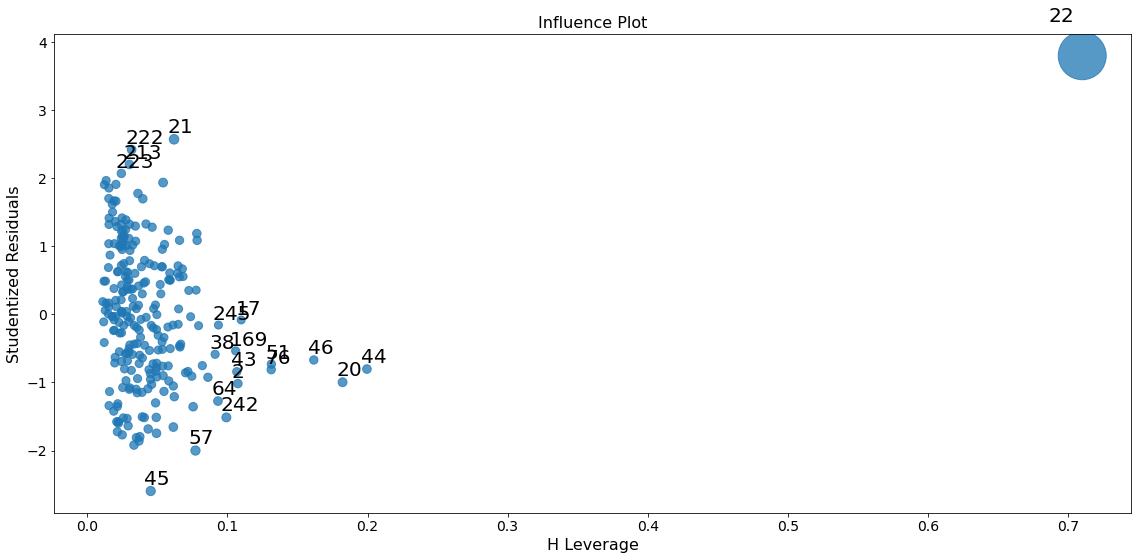

In [223]:
fig = sm.graphics.influence_plot(odor_distance_model, criterion="cooks")
fig.tight_layout(pad=1.0)
# fig.savefig('influenceplot.jpeg')

In [224]:
plt.rc("figure", figsize=(15,30))
plt.rc("font")

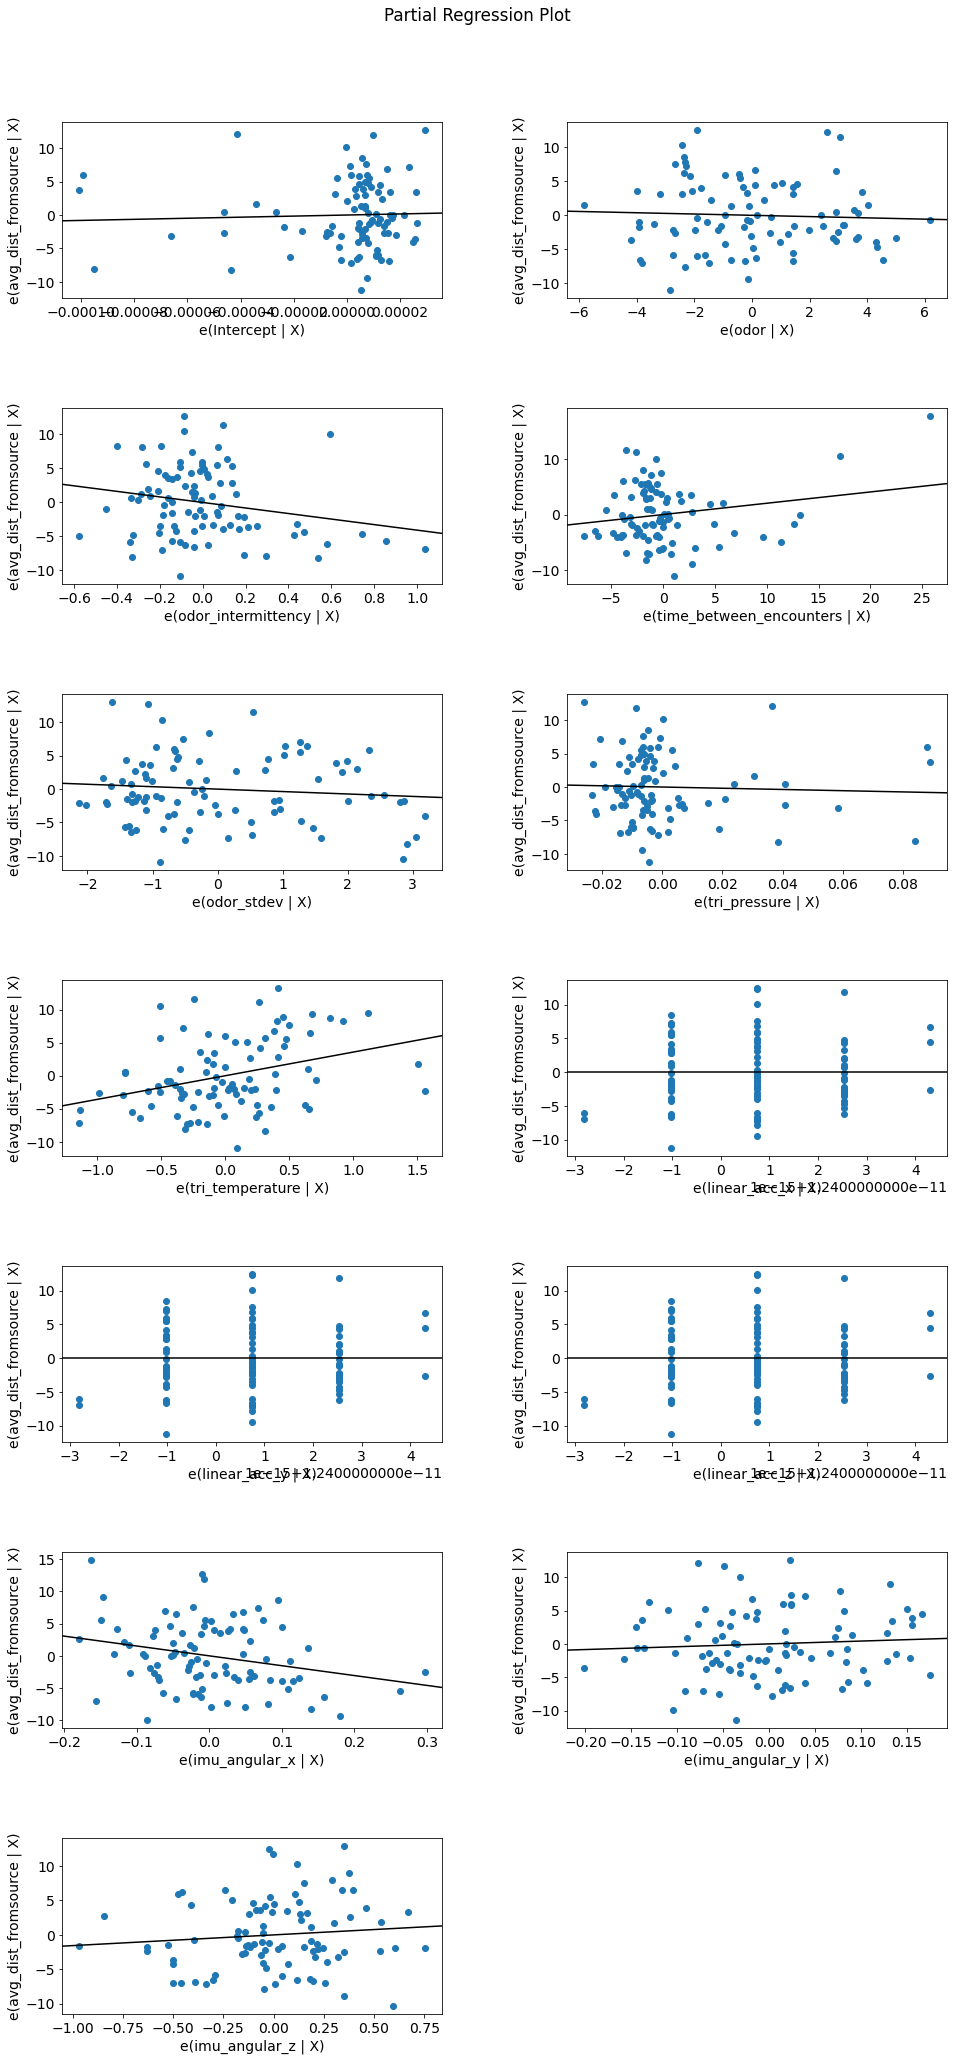

In [225]:
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=5.0)
# fig.savefig('regressplot.jpeg')

### Finding odor encounter distance from source

In [ ]:
# df_pos['time'] = df_tmp['time']
# df_pos['distance']=hp.haversine_distance(df_tmp._ublox_gps_fix_latitude.astype(float),df_tmp._ublox_gps_fix_longitude.astype(float), 39.67650835454546,-119.82060767454543)
# df_pos['odor_concentration'] = df_tmp['_analog_output_data']